In [ ]:
# function KeepClicking(){
#    console.log("Clicking");
#    document.querySelector("colab-toolbar-button#connect").click()
# }setInterval(KeepClicking,60000)

In [1]:

import pandas as pd
from matplotlib import pyplot as plt


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pandas import datetime
from matplotlib import pyplot

In [3]:

# Load the dataset using pandas
def parser(t):
    return datetime.strptime(t,"\'[%H:%M:%S %d/%m/%Y]\'")


df = pd.read_csv("samples.csv",header=0,index_col=0,parse_dates=['Time and date'] , date_parser = parser,squeeze=True) 
df.head(5)

Time and date
1995-05-11 11:00:24    70
1995-05-11 11:00:25    70
1995-05-11 11:00:26    70
1995-05-11 11:00:27    70
1995-05-11 11:00:28    69
Name: PULSE, dtype: int64

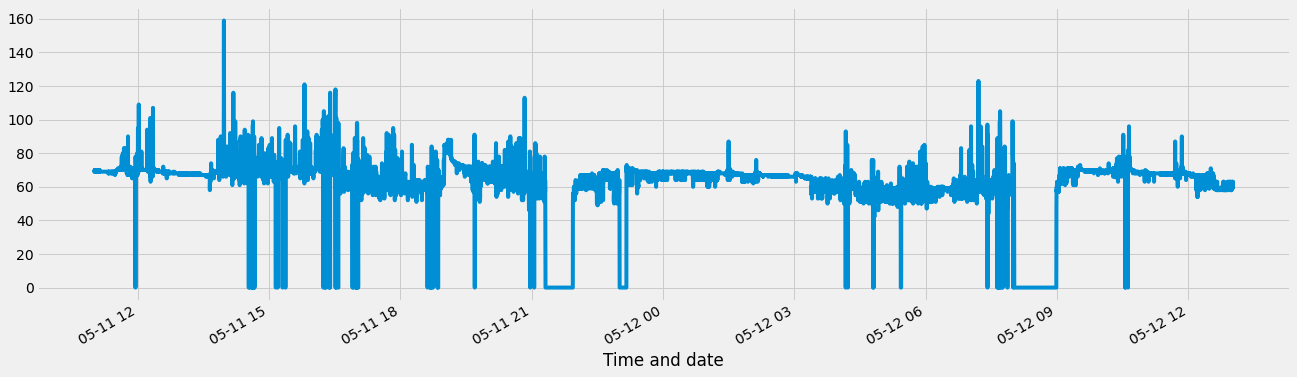

In [4]:
plt.figure(figsize=(20,6))
df.plot()
plt.show()

Box-plot: to understand the distribution of values by time interval. Outliers can be detected i.e, irrelavent values (like 0 in the above graph) so that these can be replaced with other relavent values.

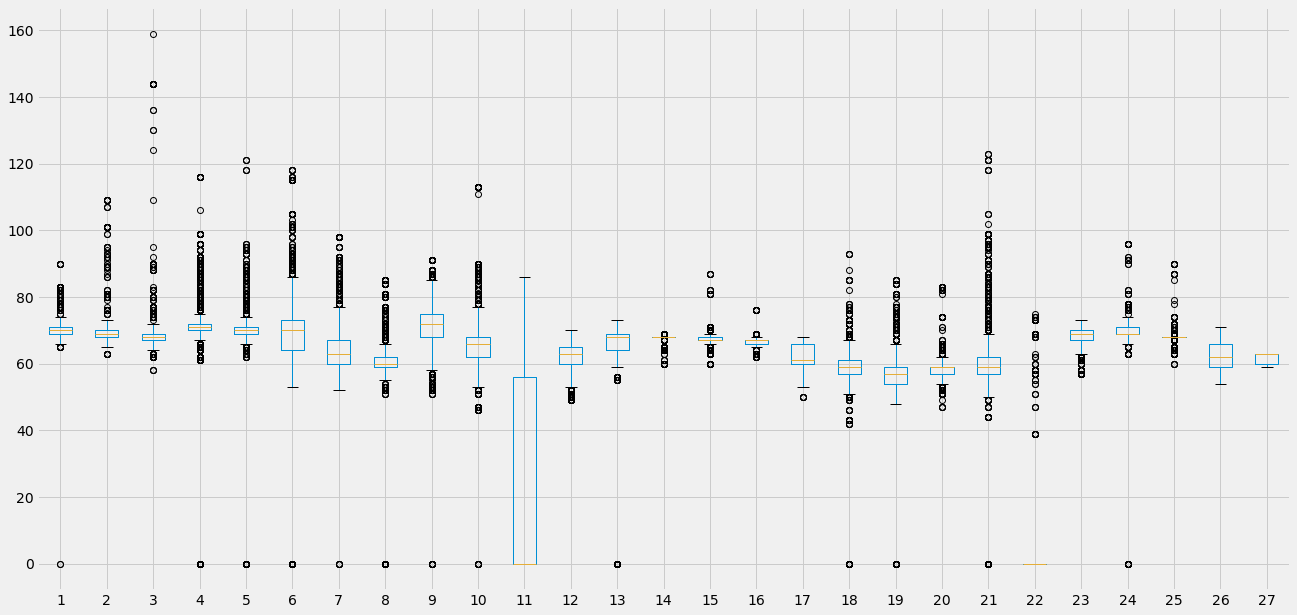

In [5]:
from pandas import Grouper, DataFrame,concat
# one_day = df['1995-05-11']

groups = df.groupby(Grouper(freq='H'))

# for x in groups:
#   print(x)

hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,28)

plt.figure(figsize=(20,10))
hours.boxplot()
plt.show()

Box-plot: to understand the distribution of values by time interval. Outliers can be detected i.e, irrelavent values (like 0 in the above graph) so that these can be replaced with other relavent values.

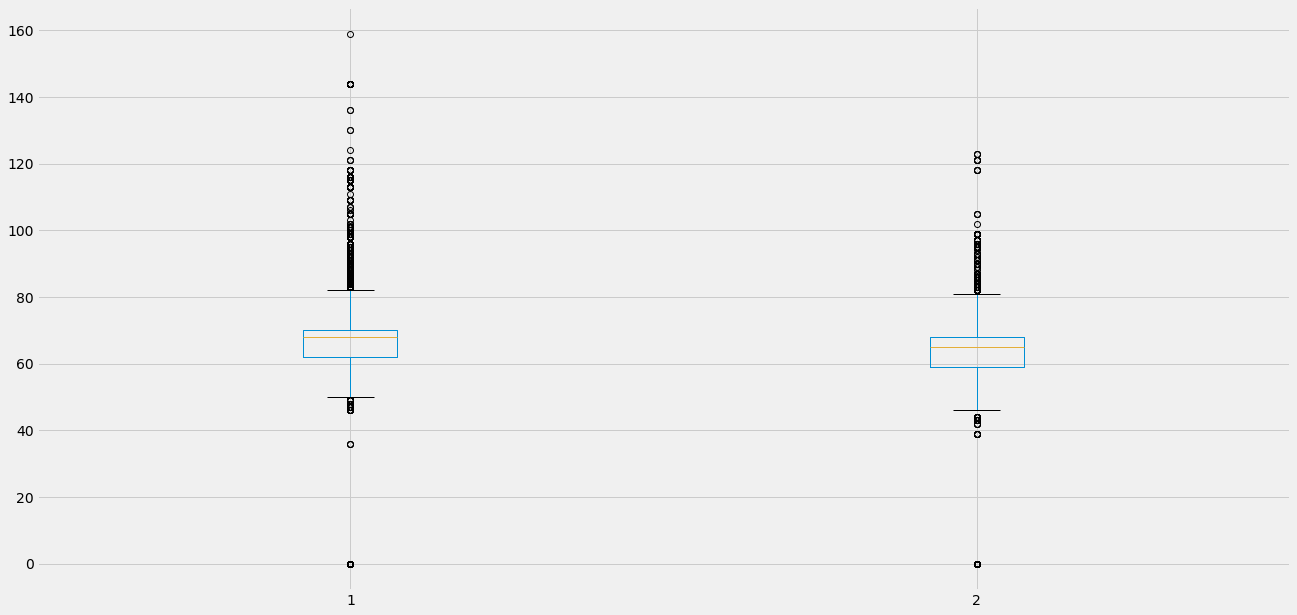

In [6]:

groups = df.groupby(Grouper(freq='D'))
dates = concat([DataFrame(x[1].values) for x in groups], axis=1)
dates = DataFrame(dates)
dates.columns = range(1,3)

plt.figure(figsize=(20,10))
dates.boxplot()
plt.show()

The PULSE is stable on the second day when compared to the day-1

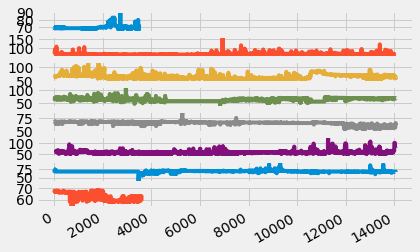

In [29]:
groups = df.groupby(Grouper(freq='4H'))
hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hours = DataFrame(hours)
hours.columns = range(1,9)

hours.plot(subplots=True,legend=False)
plt.show()

# plt.figure(figsize=(20,10))
# hours.boxplot()
# plt.show()

To compare the relation b/w the previous and present values plotting lag plot with lag=1. Since it is one day data... we cannot compare b/w days.
Try to get more than one day data and compare within days to observe any trends.

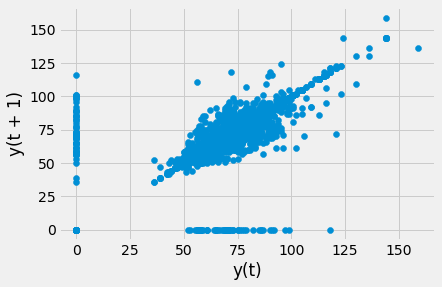

In [8]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df) #lag=1

Seasonal trends - explains the periodic upps and downs. in a on day data, the peak and low pulse is at what point of time.

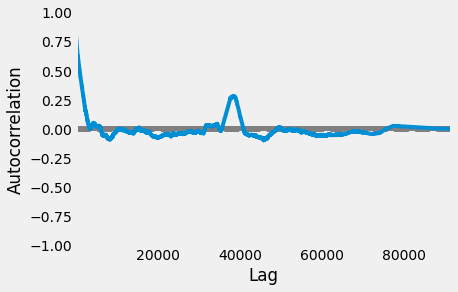

In [9]:
autocorrelation_plot(df)
plt.show()

### Resamling Dataset

In [10]:
df1=df

for i in range(1,len(df)):
  if df[i]==0:
    df[i]=df[i-1]

df1 = df1.resample('10S').mean()
df1

Time and date
1995-05-11 11:00:20    69.666667
1995-05-11 11:00:30    69.000000
1995-05-11 11:00:40    69.200000
1995-05-11 11:00:50    70.000000
1995-05-11 11:01:00    70.000000
                         ...    
1995-05-12 13:00:30    59.222222
1995-05-12 13:00:40    59.400000
1995-05-12 13:00:50    61.200000
1995-05-12 13:01:00    63.000000
1995-05-12 13:01:10    62.000000
Freq: 10S, Name: PULSE, Length: 9366, dtype: float64

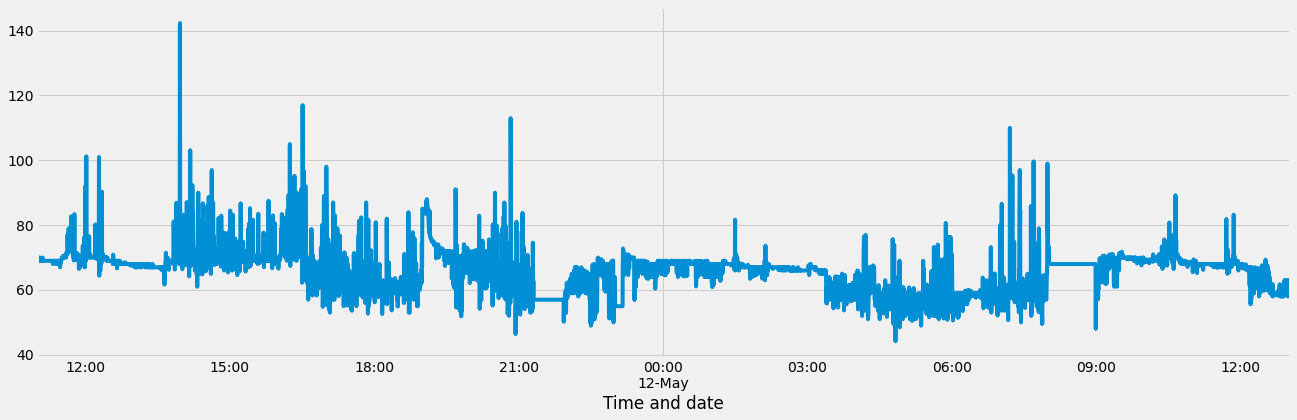

In [11]:
plt.figure(figsize=(20,6))
df1.plot()
plt.show()

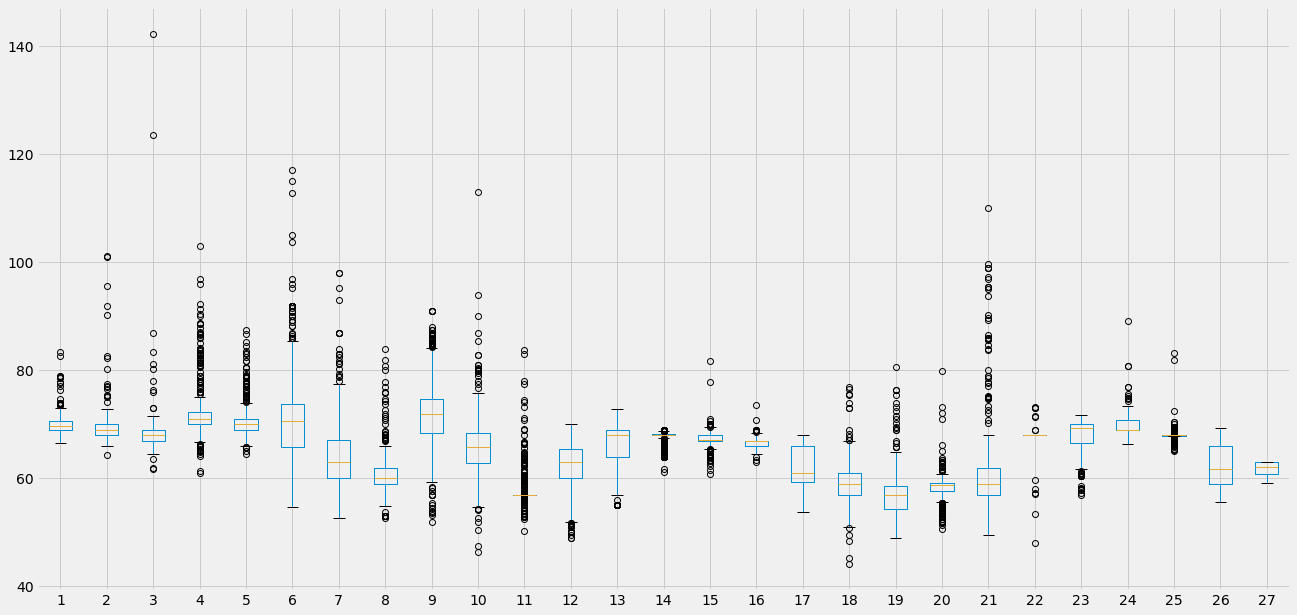

In [12]:
# one_day = df['1995-05-11']
groups = df1.groupby(Grouper(freq='H'))

# for x in groups:
#   print(x)

hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,28)

plt.figure(figsize=(20,10))
hours.boxplot()
plt.show()

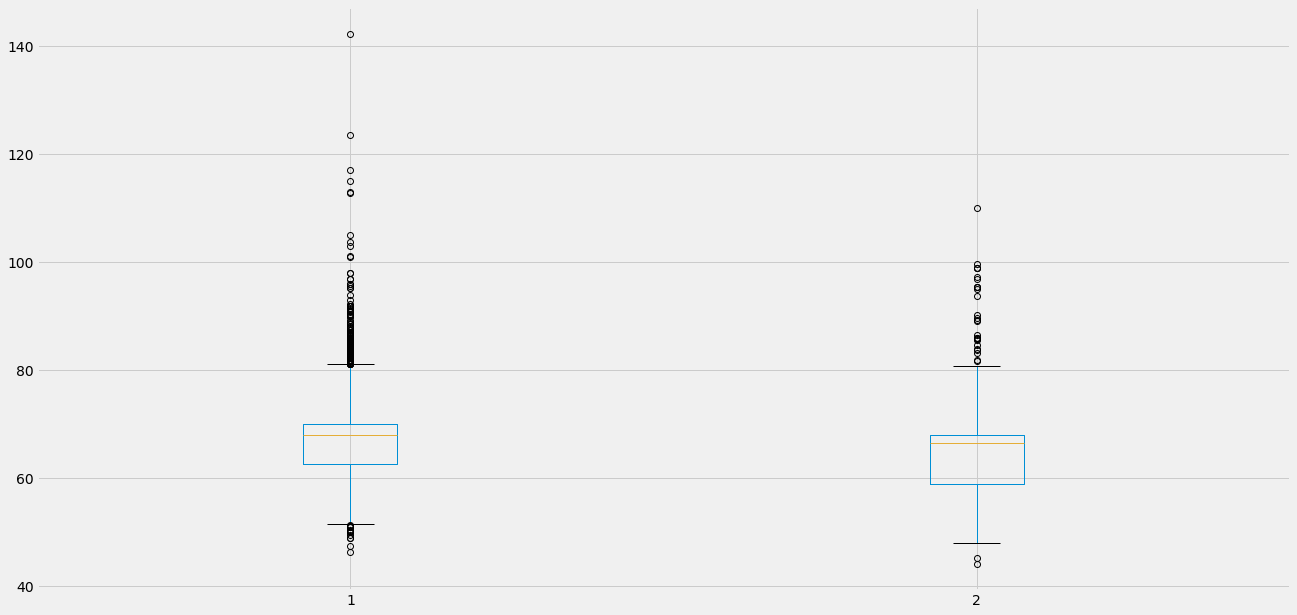

In [13]:
# one_day = df['1995-05-11']
groups = df1.groupby(Grouper(freq='D'))
dates = concat([DataFrame(x[1].values) for x in groups], axis=1)
dates = DataFrame(dates)
dates.columns = range(1,3)

plt.figure(figsize=(20,10))
dates.boxplot()
plt.show()

Correlation

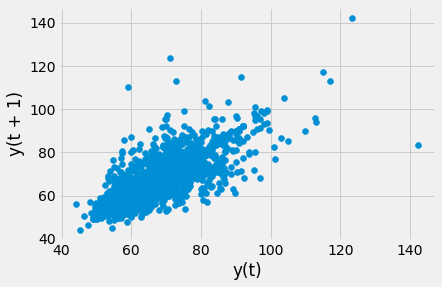

In [14]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df1) #lag=1

In [15]:
# correlation
values = DataFrame(df1.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


#=> good correlation

          t-1       t+1
t-1  1.000000  0.860204
t+1  0.860204  1.000000


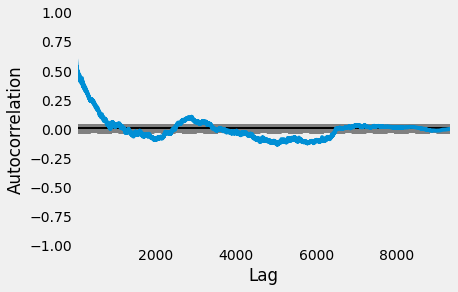

In [16]:
autocorrelation_plot(df1)

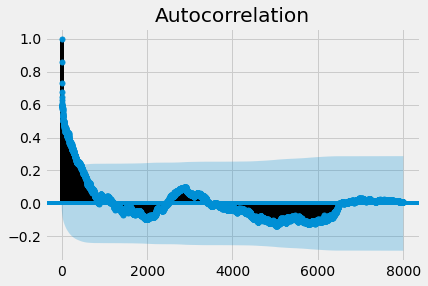

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1, lags=8000)
plt.show()

In [18]:
groups = df1.groupby(Grouper(freq='4H'))
hours = concat([DataFrame(x[1].values) for x in groups], axis=1)
hourse = DataFrame(hours)
hours.columns = range(1,9)


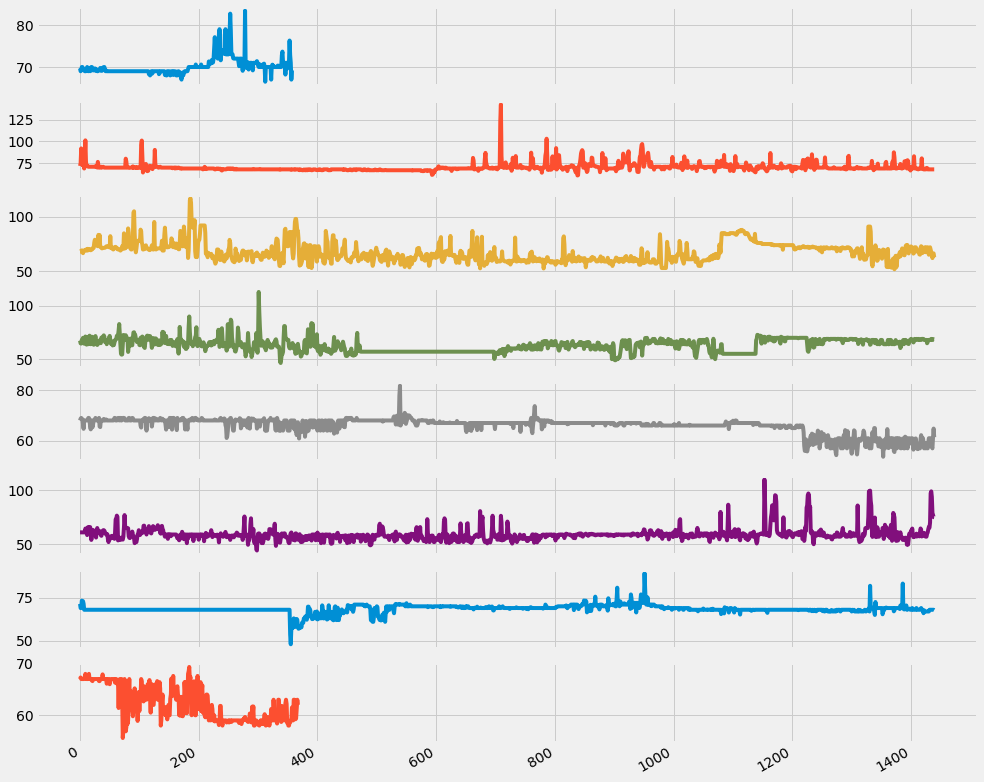

In [19]:
hours.plot(subplots=True,figsize=(15,15),legend=False)
plt.show()

statistic-Test

Agumented Dickey Fuller Test - to test whether the data is stationary or not. This test is used to check whether the series has unit root or not? if it exists, the model is stationary.

What is stationary data - mean, variance and autocorrelation sturcture do not change/depend with time
If the data donot have trend/seasonality, it is stationary.


How to make data stationary - if there is clear trend,sesonality then model the components, remove from observations and train models on residuals

In [20]:
X=df1.values
X1,X2 = X[:round(len(X)/2)],X[round(len(X)/2):]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)
print(var1,var2)

67.1608370702541 64.33303437967115
50.09430384926159 31.461657758951226


Mean doesn't vary much... variance?

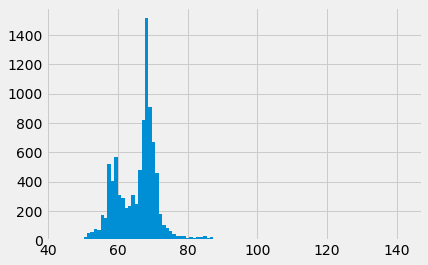

In [21]:
df1.hist(bins=100)
plt.show()

Not a gaussian => mean and variance are less meaningful => can be non-stationary

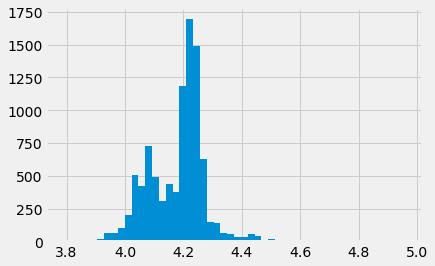

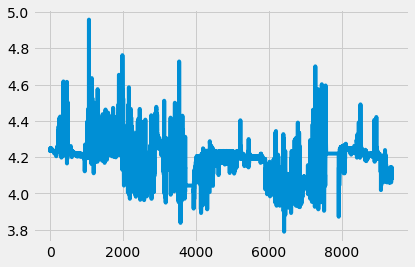

In [22]:
X_log = np.log(X)
plt.hist(X_log,bins=50)
plt.show()
plt.plot(X_log)
plt.show()

Not an exponential sesonality

In [27]:
#ADF #kpss #PP
from statsmodels.tsa.stattools import adfuller,kpss

X=df1.values
result_adf = adfuller(df1)
print(result_adf)

result_kpss = kpss(df1)
print(result_kpss)





(-5.656922383771096, 9.573784079647399e-07, 33, 9332, {'1%': -3.431050932240579, '5%': -2.861849767913357, '10%': -2.5669348843771203}, 47994.46214351107)
(4.208890465992514, 0.01, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


ADF - to determine given series follows a trend or not.
The test statistic is -5. The more negative the statistic is, the more we reject null hypothesis. The statistic value < 5%,1% values => rejecting null hypothesis. Also p-value is close to zero.
Hence stationary...!!


Similarly kpss test(null-hypo:stationary series). if p-val<0.05 => non-stationary
here p-val>0.05 => stationary 

In [66]:

# granger causality test
# smoothing(to reduce noise, clearly observe the trend) 
# - can be done using moving average, localized (weighted) regression

In [31]:
X = dataframe.values
train,test = X[:len(X)-180],X[len(X)-180:]
train_X,train_y = train[:,0],train[:,1]
test_X,test_y = test[:,0],test[:,1]

Basic model: 
Persistance model, it uses t-1 value to predict the t+1 value.
baseline algo 

RMSE is 1.6277021429358536


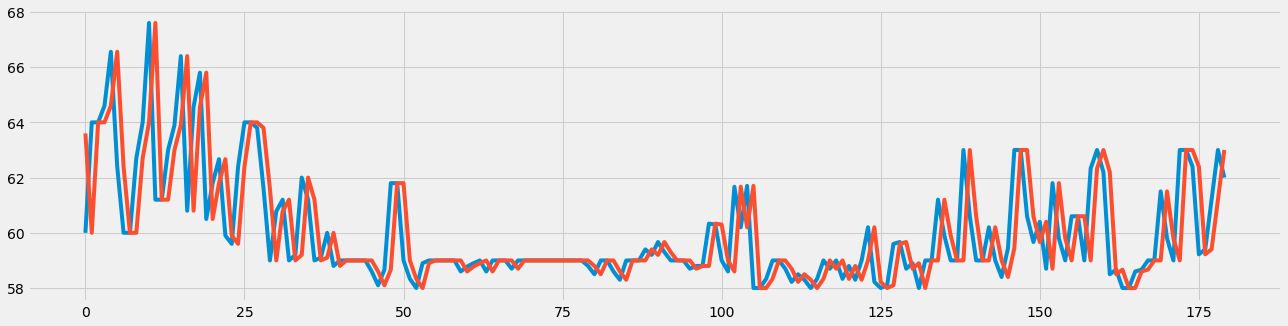

In [32]:
from statsmodels.tools.eval_measures import rmse

def model_persistence(x):
  return x

predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
err_LSTM = rmse(test_y, predictions)
print('RMSE is {}'.format(err_LSTM))

plt.figure(figsize=(20,5))
plt.plot(test_y)
plt.plot(predictions)
plt.show()

Auto regression model - linear reg using lagged values